In [1]:
from oldModel import OrientationWei, sensory_noise_dist, sensory_noise_dist_sample
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns
# sns.set_context('talk')
import scipy.stats as ss
import math

from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
import ipywidgets as widgets
# from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

import riskSingleObserverPercept as model
import WeiPerception as wei
import tools as tools


In [2]:
import riskSingleObserverPercept as model
import WeiPerception as wei
import tools as tools

# Some plots

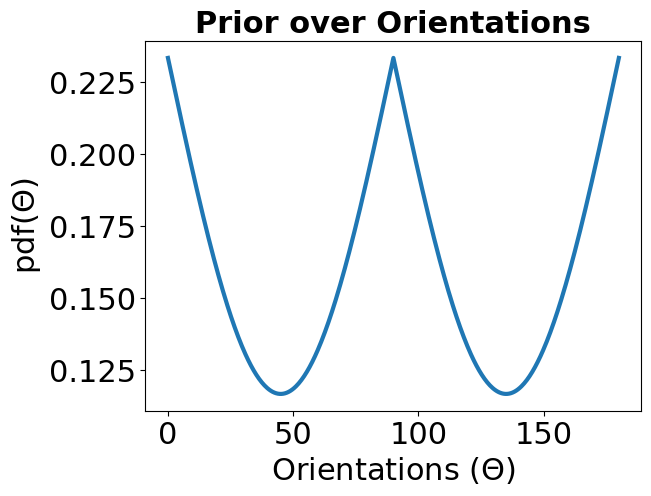

In [5]:
plt.plot(model.stim_ori_grid*90./np.pi, tools.prior_ori(tools.stim_ori_grid))
trapezoid(tools.prior_ori(tools.stim_ori_grid), tools.stim_ori_grid)


plt.ylabel("pdf($\Theta$)")
plt.xlabel("Orientations ($\Theta$)")
plt.title("Prior over Orientations", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")

42.0

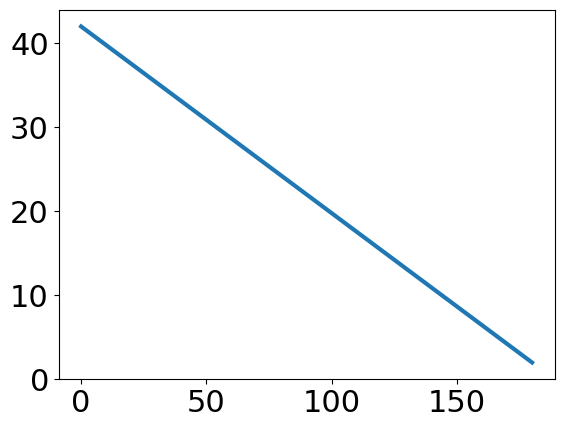

In [23]:
plt.plot(tools.stim_ori_grid*90./np.pi, tools.value_function_ori(tools.stim_ori_grid, "linearDecrease"))

max(tools.value_function_ori(tools.stim_ori_grid, "prior"))

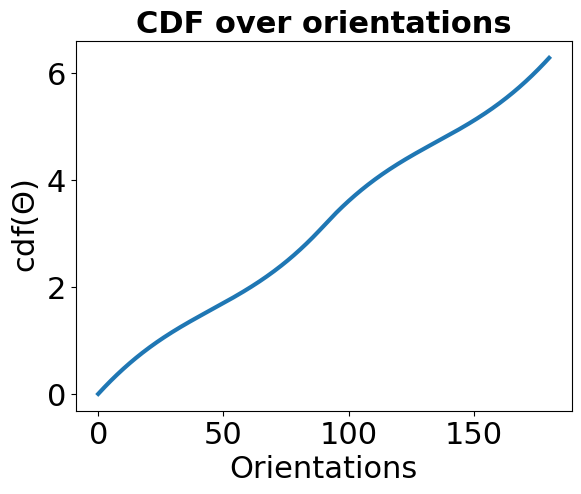

In [6]:
plt.plot(model.stim_ori_grid*90./np.pi, model.cdf_ori(model.stim_ori_grid, model.stim_ori_grid))
# plt.plot(tools.value_function_ori(model.stim_ori_grid, "cdf_prior"))

plt.ylabel("cdf($\Theta$)")
plt.xlabel("Orientations")
plt.title("CDF over orientations", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")

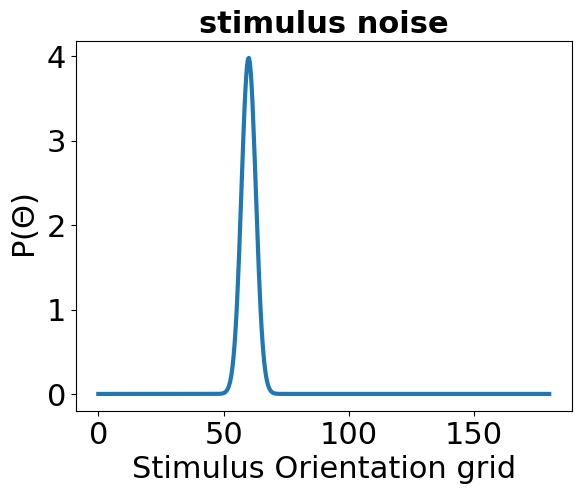

In [21]:
plt.plot(model.stim_ori_grid*90./np.pi, model.stimulus_ori_noise(60./90.*np.pi, 100, model.stim_ori_grid))

plt.ylabel("P($\Theta$)")
plt.xlabel("Stimulus Orientation grid")
plt.title("stimulus noise", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")

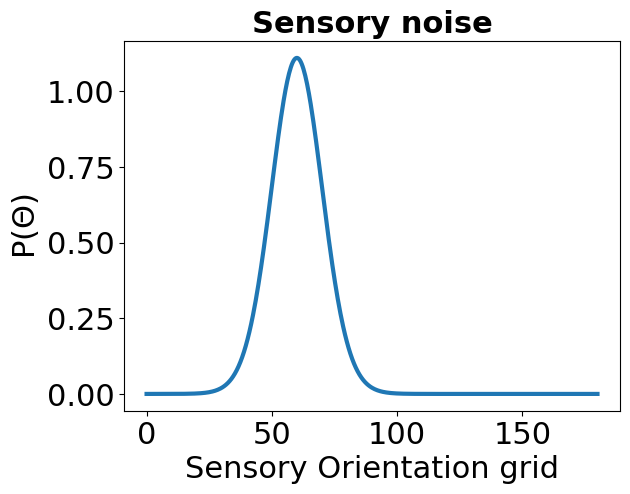

In [25]:
plt.plot(model.rep_ori_grid*90./np.pi, model.sensory_ori_noise(60./90.*np.pi, 8, model.rep_ori_grid))

plt.ylabel("P($\Theta$)")
plt.xlabel("Sensory Orientation grid")
plt.title("Sensory noise", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")

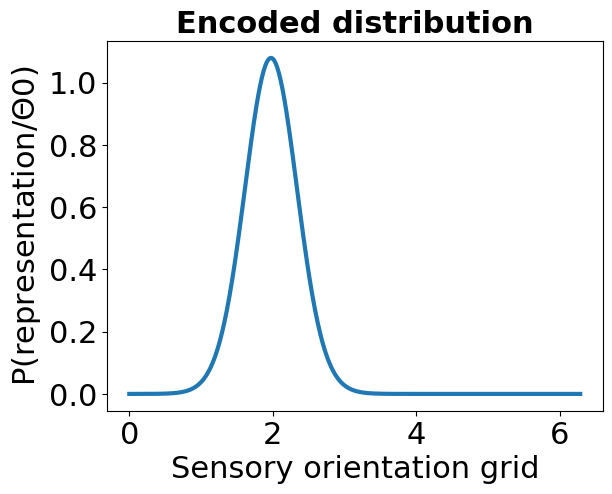

In [27]:

p_m_given_theta0, p_m_given_theta = model.MI_efficient_encoding(60./90.*np.pi, 100, 8)

# p_m_given_theta[np.argsort(tools.value_function_ori(tools.stim_ori_grid, type))]

plt.plot(model.rep_ori_grid, p_m_given_theta0[0])

# plt.plot(model.rep_val_grid, p_m_given_val[400])

plt.ylabel("P(representation/$\Theta0$)")
plt.xlabel("Sensory orientation grid")
plt.title("Encoded distribution", size = 22,fontweight="bold")

plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")


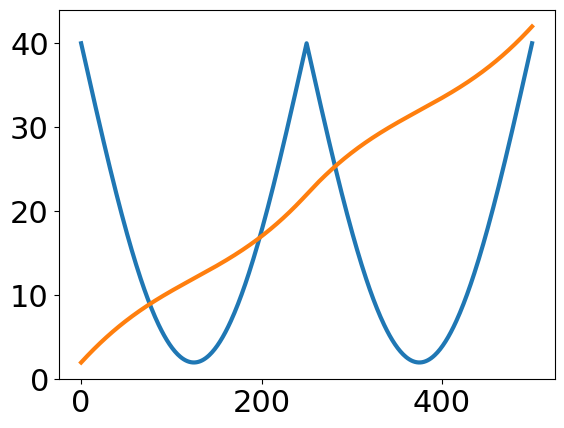

In [8]:

plt.plot((40 - np.abs(38*np.sin(model.stim_ori_grid))))
plt.plot(tools.value_function_ori(model.stim_ori_grid, "cdf_prior"))
# plt.plot((2-(np.arctan(3*np.abs(np.sin(model.stim_grid)))/np.arctan(3))) / 7.61399)

Text(0.5, 1.0, 'Wei : Bias -\n Varying stimulus noise')

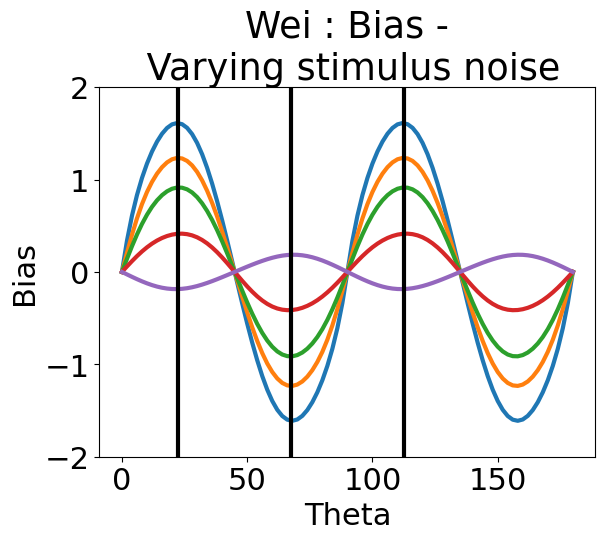

In [5]:
y=wei.x
y = np.append(y,2*np.pi)

ppp1 = wei.bias(kappa = 8, kappa_s = 10000)
ppp1[0]=ppp1[0]-2*np.pi
ppp1 = np.append(ppp1,ppp1[0])

ppp2 = wei.bias(kappa = 8, kappa_s = 32)
# ppp2[0]=ppp2[0]-2*np.pi
ppp2 = np.append(ppp2,ppp2[0])
ppp3 = wei.bias(kappa = 8, kappa_s = 16)
# ppp3[0]=ppp3[0]-2*np.pi
ppp3 = np.append(ppp3,ppp3[0])
ppp4 = wei.bias(kappa = 8, kappa_s = 8)
# ppp4[0]=ppp4[0]-2*np.pi
ppp4 = np.append(ppp4,ppp4[0])
ppp5 = wei.bias(kappa = 8, kappa_s = 4)
# ppp5[0]=ppp5[0]-2*np.pi
ppp5 = np.append(ppp5,ppp5[0])

# ppp1
plt.plot(90*y/np.pi,90*ppp1/np.pi)
plt.ylim(-2,2)
plt.plot(90*y/np.pi,90*ppp2/np.pi)
plt.plot(90*y/np.pi,90*ppp3/np.pi)
plt.plot(90*y/np.pi,90*ppp4/np.pi)
plt.plot(90*y/np.pi,90*ppp5/np.pi)


plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
plt.axvline(112.5, c='k')

plt.xlabel('Theta')
plt.ylabel('Bias')
plt.title('Wei : Bias -\n Varying stimulus noise')

Text(0, 0.5, 'bias')

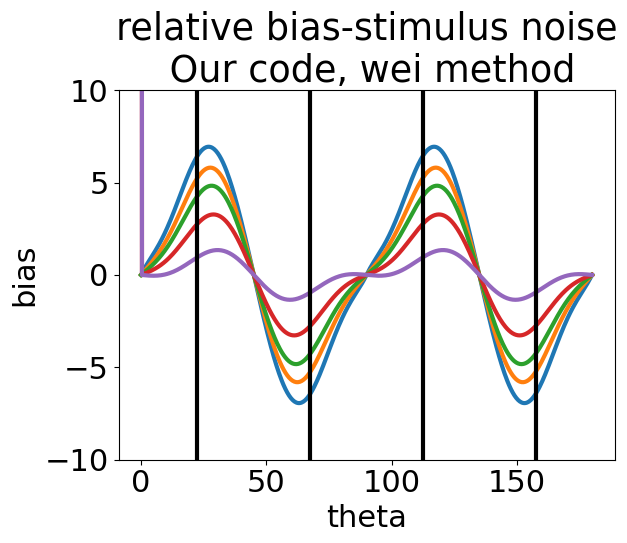

In [8]:

y = model.stim_ori_grid

theta0 = np.linspace(0.0, 2.*np.pi, 500) #0.8
kappa1 = 10000
kappa2 = 32
kappa3 = 16
kappa4 = 8
kappa5 = 4


normalize = False

kappa_r = 8

pp1 = model.wei_bias(theta0, kappa1, kappa_r, normalize)
pp1[0]=pp1[0]#-2*np.pi


pp2 = model.wei_bias(theta0, kappa2, kappa_r, normalize)
pp2[0]=pp2[0]-2*np.pi


pp3 = model.wei_bias(theta0, kappa3, kappa_r, normalize)
pp3[0]=pp3[0]-2*np.pi

pp4 = model.wei_bias(theta0, kappa4, kappa_r, normalize)
pp4[0]=pp4[0]#-2*np.pi

pp5 = model.wei_bias(theta0, kappa5, kappa_r, normalize)
pp5[0]=pp5[0]#-2*np.pi

# ppp1
plt.plot(90*y/np.pi,90*pp1/np.pi)
plt.ylim(-10,10)
plt.plot(90*y/np.pi,90*pp2/np.pi)
plt.plot(90*y/np.pi,90*pp3/np.pi)
plt.plot(90*y/np.pi,90*pp4/np.pi)
plt.plot(90*y/np.pi,90*pp5/np.pi)


plt.title('relative bias-stimulus noise\n Our code, wei method')

plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
plt.axvline(112.5, c='k')
plt.axvline(157.5, c='k')

plt.xlabel('theta')
plt.ylabel('bias')

Text(0, 0.5, 'Mean bias')

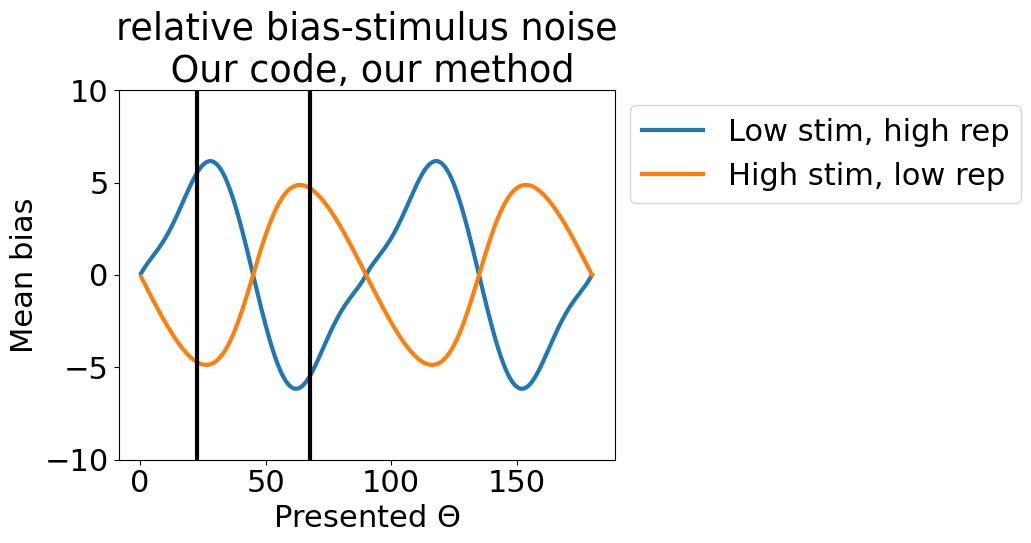

In [11]:
theta0 = model.stim_ori_grid #0.8
# theta0 = theta0[:-1]
kappa1 = 10000
kappa2 = 8

# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa1, kappa, normalize = False)
# plt.plot(theta0*90./np.pi, (E_theta_given_theta0 - theta0)*90./np.pi, label = "Low stim")

# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappas1, kappar1, normalize = False)
# plt.plot(theta0[1:]*90./np.pi, (E_theta_given_theta0 - theta0)[1:]*90./np.pi, label = "Low stim, low rep")


E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa1, kappa2, normalize = False)
plt.plot(theta0[1:]*90./np.pi, (E_theta_given_theta0 - theta0)[1:]*90./np.pi, label = "Low stim, high rep")



E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa2, kappa1, normalize = False)
plt.plot(theta0[1:]*90./np.pi, (E_theta_given_theta0 - theta0)[1:]*90./np.pi, label = "High stim, low rep")




plt.ylim(-10.0,10.0)

plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
# plt.axvline(112.5, c='k')
# plt.axvline(157.5, c='k')


plt.legend(bbox_to_anchor=(1., 1.0))

plt.title('relative bias-stimulus noise\n Our code, our method')
plt.xlabel("Presented $\Theta$")
plt.ylabel("Mean bias")
# plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

## Gifs

In [ ]:
theta0List = np.linspace((0./90.)*np.pi, (45./90.)*np.pi, 23)
sigma_stim = 0.05*np.pi

i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plt.plot(model.stim_grid*180./np.pi, np.squeeze(model.stimulus_noise(theta0, kappa_s=sigma_stim, grid=model.stim_grid[np.newaxis, :])))
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %02d°'%((theta0*180.)/np.pi))
        
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %02d°'%((theta0*180.)/np.pi))
    
    plt.legend()
    
    plt.title("Noisy stimulus (completely controllable in the experiment)")
    plt.xlabel("$\Theta$ (in degrees)")
    plt.ylabel("P($\Theta$)")
#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()

# Back to simulations now of value

90.0
56.88
p_chose_risky =  [[0.5118174]]


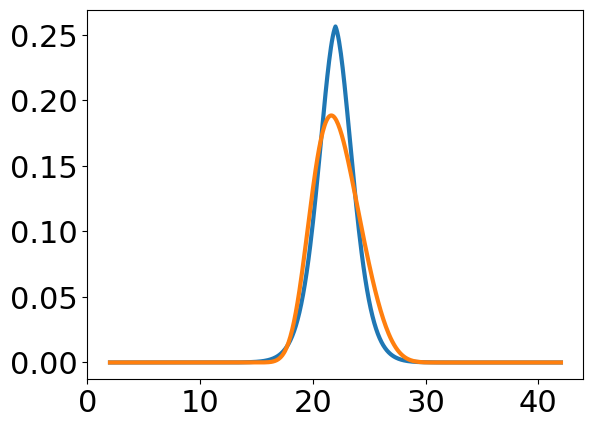

In [3]:
kappa_s = 10000
kappa_r = 16

theta0 = 90.*np.pi/90.
type = "linearDecrease"
risk_prob = 0.75
theta1 = float(tools.inverse_monotonic(tools.value_function_ori(theta0, type)/risk_prob, type))
# theta1 is chosen such that it corresponds to val;ue of theta0 in risky domain dso distributions should lie on each other

# plt.plot(model.bayesian_decoding(theta0, kappa_s, kappa_r)[0])

print(theta0*90/np.pi)
print(theta1*90/np.pi)


safe_value, safe_prob = model.safe_value_dist(theta0, kappa_s, kappa_r, type)
rr, risky_prob = model.risky_value_dist(theta1, kappa_s, kappa_r, risk_prob, type)

plt.plot(safe_value, safe_prob[0])
plt.plot(safe_value, risky_prob[0])

print("p_chose_risky = ", tools.diff_dist(safe_value, risky_prob, safe_prob))



abs(trapezoid(safe_prob, safe_value, axis = -1))

# Uncovering risk attitudes

0.7364203137206783

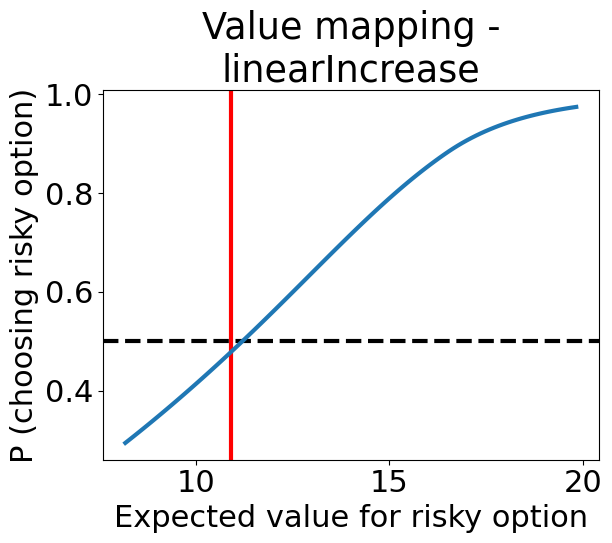

In [3]:
# setting parameters
experimentEffects = "00to180"#"00to45"
risk_prob = 0.75
type = "linearIncrease" 

stim_noise = 10000
rep_noise = 8
start = 40/90*np.pi

# Getting all the values from actual transformation
interval = 70/90.*np.pi
if (type=="prior" or type=="linearDecrease" or type=="curvedPrior"):
    rangeOri = np.linspace(start, (start-interval), 100)
else:
    rangeOri = np.linspace(start, (start+interval), 100)

val_range = tools.value_function_ori(rangeOri, type)
safeVal = val_range[0]
riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)

# getting inferred safe values
safe_value, safe_prob = model.safe_value_dist(rangeOri[0], stim_noise, rep_noise, type)
risky_value, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_noise, risk_prob, type)


# # Risk attitudes 
p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)

# The value of the safe option
plt.axvline(safeVal, c='r', label = "safe option\n value")
# Where the risky option value is the same as the safe option value,
# the probability of chosing should have been 0.5 i there were no biases at all.
plt.axhline(0.5, c='k', ls='--')
# plt.ylim(0.4,0.6)

# Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
# and whether it is equal to the actual rational equilibrium that would have been without biases.
plt.plot(riskyVal_range, np.squeeze(p_chose_risky))#, label=['rep',kappa_r, "stim (deg)",round(kappa_s*180,2)])

plt.xlabel("Expected value for risky option")
plt.ylabel("P (choosing risky option)")
plt.title("Value mapping -\n" + type) 

# plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)



# Comaparing two models - Both safe and risky option with same noise type

In [9]:
from oldModel import OrientationWei, sensory_noise_dist, sensory_noise_dist_sample
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns
# sns.set_context('talk')
import scipy.stats as ss
import math

from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
import ipywidgets as widgets
# from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

import riskSingleObserverPercept as model
import WeiPerception as wei
import tools as tools

In [10]:
def rnp_across_safeVals(stim_noise, rep_noise, type, risk_prob, experimentEffects):

    # Getting all the values from actual transformation
    end = int(experimentEffects[-3:])-1
    start = int(experimentEffects[0:2])+1
    end = end/90.*np.pi
    start = start/90.*np.pi
    
    if (type=="prior" or type=="curvedPrior" or type =="linearDecrease"):
        start_safe = float(tools.inverse_monotonic(tools.value_function_ori(start, type)/1.5, type))
        safe_angles =  np.linspace(end, start_safe, int((end*90/np.pi-start_safe*90/np.pi+1)/3))
    else:
        end_safe = float(tools.inverse_monotonic(tools.value_function_ori(end, type)/1.5, type))
        safe_angles =  np.linspace(start, end_safe, int((start*90/np.pi+end_safe*90/np.pi-1)/3))
    
    # print("safe angles - ",safe_angles)
    rnp = np.zeros(len(safe_angles))
    safeVals = np.zeros(len(safe_angles))

    for i in range(len(safe_angles)):
        interval = abs(float(tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type), type)-tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type)*1.5, type)))
        if (type=="prior" or type=="curvedPrior" or type=="linearDecrease"):
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]-(interval), 20)
        else:
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]+(interval), 20)

        # print("range - ", rangeOri*90/np.pi)
        # print("interval - ",interval)

        safeVal = float(tools.value_function_ori(safe_angles[i], type))
        safeVals[i] = safeVal
        val_range = tools.value_function_ori(rangeOri, type)
        riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)

        # print("safeval - ", safeVal, "range val - ", val_range)

        # getting inferred safe values
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], stim_noise, rep_noise , type)
        rr, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_noise, risk_prob, type)

        # Risk attitudes 
        p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)
        print("safe angle - ", safe_angles[i]*90./np.pi)
        print(p_chose_risky[0,::2])
        rnp[i] = tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)
        print(rnp[i])

    return safe_angles, safeVals, rnp



safe angle -  1.0
[0.29505505 0.27959952 0.26672698 0.25673204 0.24981381 0.24607032
 0.24549903 0.24800299 0.25340164 0.26144494]
-0.42129917230601094
safe angle -  4.115675675675676
[0.2773027  0.2735243  0.27737482 0.28820405 0.30513646 0.32715936
 0.35320376 0.38221199 0.41318893 0.44523674]
0.6019192781898393
safe angle -  7.231351351351352
[0.2374809  0.25823529 0.28650552 0.32064616 0.35911203 0.40050905
 0.44361357 0.48737227 0.53089238 0.57342892]
0.7179206674943882
safe angle -  10.347027027027028
[0.2036359  0.23941691 0.28077509 0.32636637 0.37498146 0.42550402
 0.47688784 0.52815405 0.57840324 0.62683553]
0.7450364721306432
safe angle -  13.462702702702705
[0.17466299 0.21715964 0.26524926 0.31793345 0.37408276 0.43244017
 0.49167114 0.55043874 0.60748506 0.6617043 ]
0.7501113043891775
safe angle -  16.578378378378382
[0.14993965 0.19366063 0.24386191 0.29969269 0.35994098 0.42310721
 0.48752159 0.55148079 0.61338182 0.6718348 ]
0.750693874787565
safe angle -  19.694054054

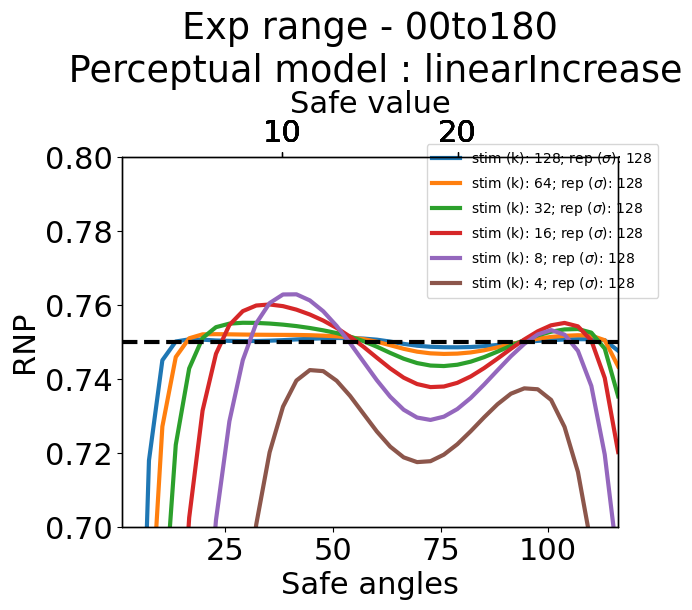

In [11]:
# setting parameters
experimentEffects = tools.experimentRange #"00to45"
risk_prob = 0.75
type = "linearIncrease"

# changeable parameters
# stim_list = [10000]
# rep_list = [64, 32, 16, 8, 4]
# High stim noise
stim_list = [128, 64, 32, 16, 8, 4]
rep_list = [128]

fig = plt.figure()
ax1 = fig.add_subplot(111)

for stim_noise in stim_list:
    for rep_noise in rep_list:

        safe_angles, safeVals, rnp = rnp_across_safeVals(stim_noise, rep_noise, type, risk_prob, experimentEffects)
        ax1.set_ylim(0.7, 0.8)
        ax1.set_xlim(min(safe_angles*90./np.pi), max(safe_angles*90./np.pi))

        text = "stim (k): "+ str(stim_noise)+"; rep ($\sigma$): "+str(rep_noise)
        ax1.plot(safe_angles[:]*90./np.pi, rnp[:], label = text)


        ax2 = ax1.twiny()
        if (type=="prior" or type=="curvedPrior" or type == "linearDecrease"):
            ax2.set_xlim(max(safeVals), min(safe_angles))

        ax2.plot(safeVals, np.ones(len(safeVals))/1.3, alpha=0.0)

ax1.axhline(risk_prob, c='k', ls='--')
ax1.legend(bbox_to_anchor=(0.6, 0.6), prop={'size': 10})

ax2.set_xlabel("Safe value")
ax1.set_xlabel("Safe angles")
ax1.set_ylabel("RNP")
ax1.set_title("Exp range - " + tools.experimentRange + "\n Perceptual model : " + type) 


plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

# Exaggerated risks by taking opposing noise regimes

In [16]:
def find_rnp_diffNoises(safeNoise, riskyNoise, type, risk_prob, experimentEffects):
    # Getting all the values from actual transformation
    end = int(experimentEffects[-3:]) - 1
    start = int(experimentEffects[0:2]) + 1

    if (type=="prior" or type=="linearPrior" or type=="curvedPrior"):
        start_safe = float(tools.inverse_monotonic(tools.value_function_ori(start/90.*np.pi, type)/1.5, type))
        safe_angles =  np.linspace(end/90., start_safe/90., int(end-start_safe+1))*np.pi
    else:
        end_safe = float(tools.inverse_monotonic(tools.value_function_ori(end/90.*np.pi, type)/1.5, type))
        safe_angles =  np.linspace(start/90., end_safe/90., int(start+end_safe+1))*np.pi

    rnp = np.zeros(len(safe_angles))
    safeVals = np.zeros(len(safe_angles))

    for i in range(len(safe_angles)):
        if (type=="prior" or type=="linearPrior" or type=="curvedPrior" or "linearDecrease"):
            interval = float(tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type), type)-tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type)*1.5, type))
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]-(interval/90.*np.pi), 50)
        else:
            interval = abs(float(tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type), type)-tools.inverse_monotonic(tools.value_function_ori(safe_angles[i], type)*1.5, type)))
            rangeOri = np.linspace(safe_angles[i],  safe_angles[i]+(interval/90.*np.pi), 50)

        safeVal = tools.value_function_ori(safe_angles[i], type)
        safeVals[i] = safeVal
        val_range = tools.value_function_ori(rangeOri, type)
        riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)

        # getting inferred safe values
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], safeNoise[0], safeNoise[1], type)
        safe_value, risky_prob = model.risky_value_dist((rangeOri), riskyNoise[0], riskyNoise[1], risk_prob, type)

        # Risk attitudes 
        p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)
        rnp[i] = tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)

    return safe_angles, safeVals, rnp




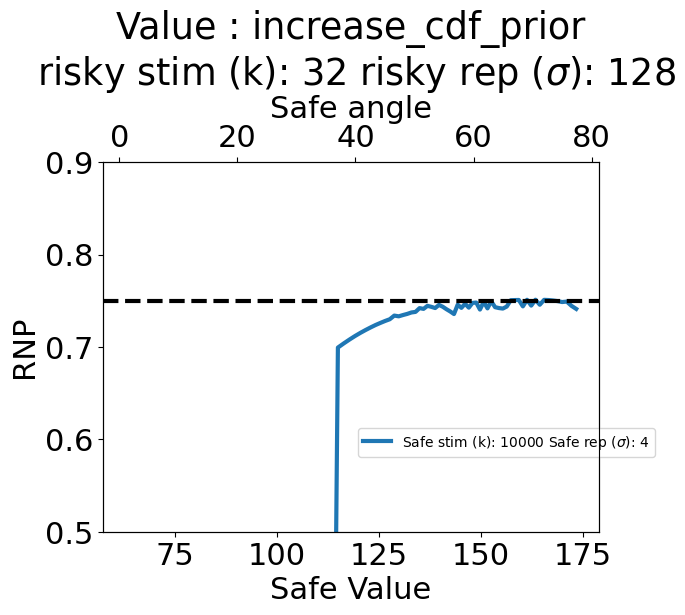

In [50]:
# setting parameters
experimentEffects = "00to180"
risk_prob = 0.75
type = "increase_cdf_prior" 

# changeable parameters
high_stim_list = [32]
low_stim_list = [10000]
high_rep_list = [4]
low_rep_list = [128]

fig = plt.figure()
ax1 = fig.add_subplot(111)

for high_stim_noise in high_stim_list:
    for high_rep_noise in high_rep_list:
        for low_stim_noise in low_stim_list:
            for low_rep_noise in low_rep_list:

                safeNoise = [low_stim_noise, high_rep_noise]
                riskyNoise = [high_stim_noise, low_rep_noise]


                safe_angles, safeVals, rnp = find_rnp_diffNoises(safeNoise, riskyNoise, type, risk_prob, experimentEffects)

                ax1.set_ylim(0.5, 0.9)

                text = "Safe stim (k): "+ str(safeNoise[0])+" Safe rep ($\sigma$): "+str(safeNoise[1])
                # text = "Risky stim (k): "+ str(riskyNoise[0])+"; Risky rep ($\sigma$): "+str(riskyNoise[1])
                ax1.plot(safeVals[:], rnp[:], label = text)

                ax2 = ax1.twiny()
                if (type=="prior" or type=="linearPrior" or type=="curvedPrior"):
                    ax2.set_xlim(max(safe_angles*90./np.pi), min(safe_angles*90./np.pi))

                ax2.plot(safe_angles*90./np.pi, np.ones(len(safe_angles))/1.3, alpha=0.0)


ax1.axhline(risk_prob, c='k', ls='--')

ax1.legend(bbox_to_anchor=(0.5, 0.3), prop={'size': 10})
ax2.set_xlabel("Safe angle")
ax1.set_xlabel("Safe Value")
ax1.set_ylabel("RNP")
# if len(safeNoise[0])==1 and len(safeNoise[1])==1:
# ax1.set_title("Value : " + type + "\n safe stim (k): "+str(safeNoise[0])+"; safe rep ($\sigma$): "+str(safeNoise[1]))
# else:
ax1.set_title("Value : " + type + "\n risky stim (k): "+str(riskyNoise[0])+" risky rep ($\sigma$): "+str(riskyNoise[1]))
plt.savefig('/Users/sbedi/Downloads/testfig1.png',dpi=300, bbox_inches = "tight")

In [12]:
np.shape(risky_prob)

(1, 500)

In [97]:
model.value_function_ori(150./90.*np.pi, "prior")

array(10.66025404)

# risk of an option

# different noise regimes


In [ ]:
# Prior
# Noise regimes

# In the linear mapping condition, if safe option is displayed with high sensory noise it results in safe option being percieved 
# with low val and if risky is with hig stim noise, it is percieved with higher value - risk seekinfg behavior



# changeable parameters
high_stim_noise = 32
low_stim_noise = 1000
high_rep_noise = 32
low_rep_noise = 128

risk_prob = 0.75
type = "linearPrior"   

# Getting all the values from actual transformation
rangeOri = np.linspace(39/90., 22/90., 100)*np.pi
val_range = model.value_function_ori(rangeOri, type)
safeVal = val_range[0]
riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)

# getting inferred safe values
safe_value, safe_prob = model.safe_value_dist(rangeOri[0], high_stim_noise, low_rep_noise , type, interpolation_kind = "linear", bins=25)

risky_value, risky_prob = model.risky_value_dist((rangeOri), low_stim_noise, high_rep_noise, risk_prob, type, interpolation_kind = "linear",  bins=25)

# Risk attitudes 
p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

# The value of the safe option
plt.axvline(safeVal, c='r', label = "safe option\n value")
# Where the risky option value is the same as the safe option value,
# the probability of chosing should have been 0.5 i there were no biases at all.
plt.axhline(0.5, c='k', ls='--')
plt.ylim(0.4,0.6)

# Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
# and whether it is equal to the actual rational equilibrium that would have been without biases.
plt.plot(riskyVal_range, np.squeeze(p_chose_risky))#, label=['rep',kappa_r, "stim (deg)",round(kappa_s*180,2)])


# plt.legend(loc = 'lower right')

plt.xlabel("Expected value for risky option")
plt.ylabel("P (choosing risky option)")
plt.title("Value mapping -\n" + type) 

plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

model.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)

single option risk

In [36]:
def inverse_monotonic(y_0, x = model.stim_grid, y = model.value_function_ori(model.stim_grid, type="prior")):
    indices = np.argsort(y)
    y_sorted = y[indices]
    
    def find_closest_index(y_0):
        i = np.searchsorted(y_sorted, y_0, side='left')
        if i == 0:
            return 0
        elif i == len(y_sorted):
            return len(y_sorted) - 1
        else:
            if y_0 - y_sorted[i-1] < y_sorted[i] - y_0:
                return i - 1
            else:
                return i

    i = find_closest_index(y_0)
    x_inverse = x[indices[i]]*90./np.pi
    
    return x_inverse


In [29]:
# inverse_monotonic(28)*90./np.pi
model.value_function_ori(178/90.*np.pi, "prior")

array(2.69756474)

0.7499457222420786

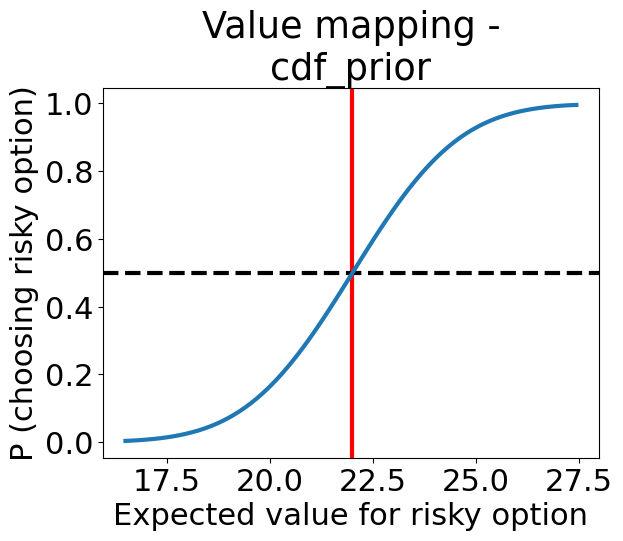

In [13]:
# setting parameters
experimentEffects = "00to180"#"00to45"
risk_prob = 0.75
type = "cdf_prior" 

stim_noise = 1000
rep_noise = 32
start = 90

# Getting all the values from actual transformation
interval = 70
rangeOri = np.linspace(start/90., (start+interval)/90., 100)*np.pi
val_range = tools.value_function_ori(rangeOri, type)
safeVal = val_range[0]
riskyVal_range = risk_prob*tools.value_function_ori(rangeOri, type)


# getting inferred safe values
safe_value, safe_prob = model.safe_value_dist(rangeOri[0], stim_noise, rep_noise, type)
risky_value, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_noise, risk_prob, type)


# # Risk attitudes 
p_chose_risky = tools.diff_dist(safe_value, risky_prob, safe_prob)

# The value of the safe option
plt.axvline(safeVal, c='r', label = "safe option\n value")
# Where the risky option value is the same as the safe option value,
# the probability of chosing should have been 0.5 i there were no biases at all.
plt.axhline(0.5, c='k', ls='--')
# plt.ylim(0.4,0.6)

# Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
# and whether it is equal to the actual rational equilibrium that would have been without biases.
plt.plot(riskyVal_range, np.squeeze(p_chose_risky))#, label=['rep',kappa_r, "stim (deg)",round(kappa_s*180,2)])

plt.xlabel("Expected value for risky option")
plt.ylabel("P (choosing risky option)")
plt.title("Value mapping -\n" + type) 

# plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

tools.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)



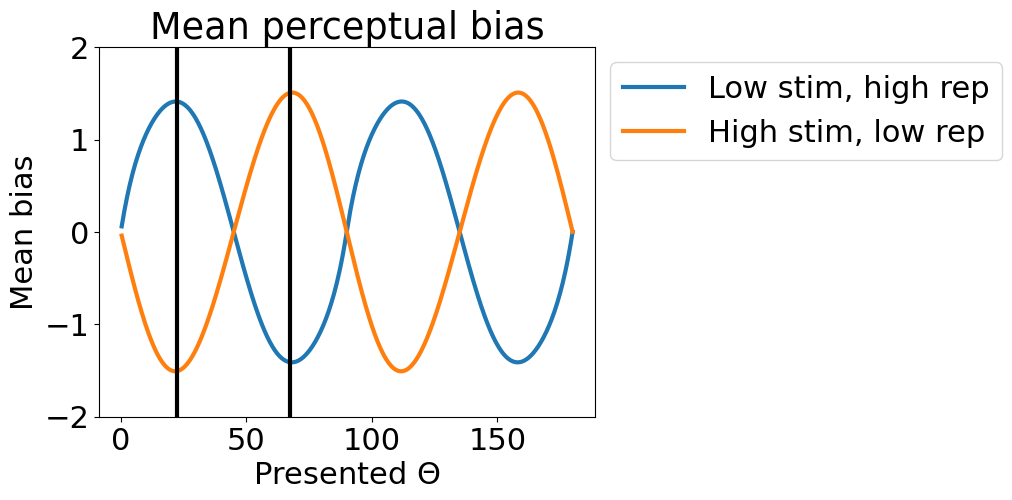

In [45]:
theta0 = model.stim_ori_grid #0.8
# theta0 = theta0[:-1]
kappa1 = 10000
kappa2 = 8

# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa1, kappa, normalize = False)
# plt.plot(theta0*90./np.pi, (E_theta_given_theta0 - theta0)*90./np.pi, label = "Low stim")

# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappas1, kappar1, normalize = False)
# plt.plot(theta0[1:]*90./np.pi, (E_theta_given_theta0 - theta0)[1:]*90./np.pi, label = "Low stim, low rep")


E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa1, kappa2, normalize = False)
plt.plot(theta0[1:]*90./np.pi, (E_theta_given_theta0 - theta0)[1:]*90./np.pi, label = "Low stim, high rep")



E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa2, kappa1, normalize = False)
plt.plot(theta0[1:]*90./np.pi, (E_theta_given_theta0 - theta0)[1:]*90./np.pi, label = "High stim, low rep")




plt.ylim(-2.0,2.0)

plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
# plt.axvline(112.5, c='k')
# plt.axvline(157.5, c='k')


plt.legend(bbox_to_anchor=(1., 1.0))

plt.title('Mean perceptual bias')
plt.xlabel("Presented $\Theta$")
plt.ylabel("Mean bias")
plt.savefig('/Users/sbedi/Downloads/teig.png',dpi=300, bbox_inches = "tight")